# Creating MIRISim input skycubes 

In [1]:
dataDir = "/Users/ioannisa/Desktop/python/miri_devel/notebooks/ISOSWS_PlanetaryNebulae/PNe_data/"
import funcs
import numpy as np
from astropy.io import fits
import scipy.interpolate as scp_interpolate
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


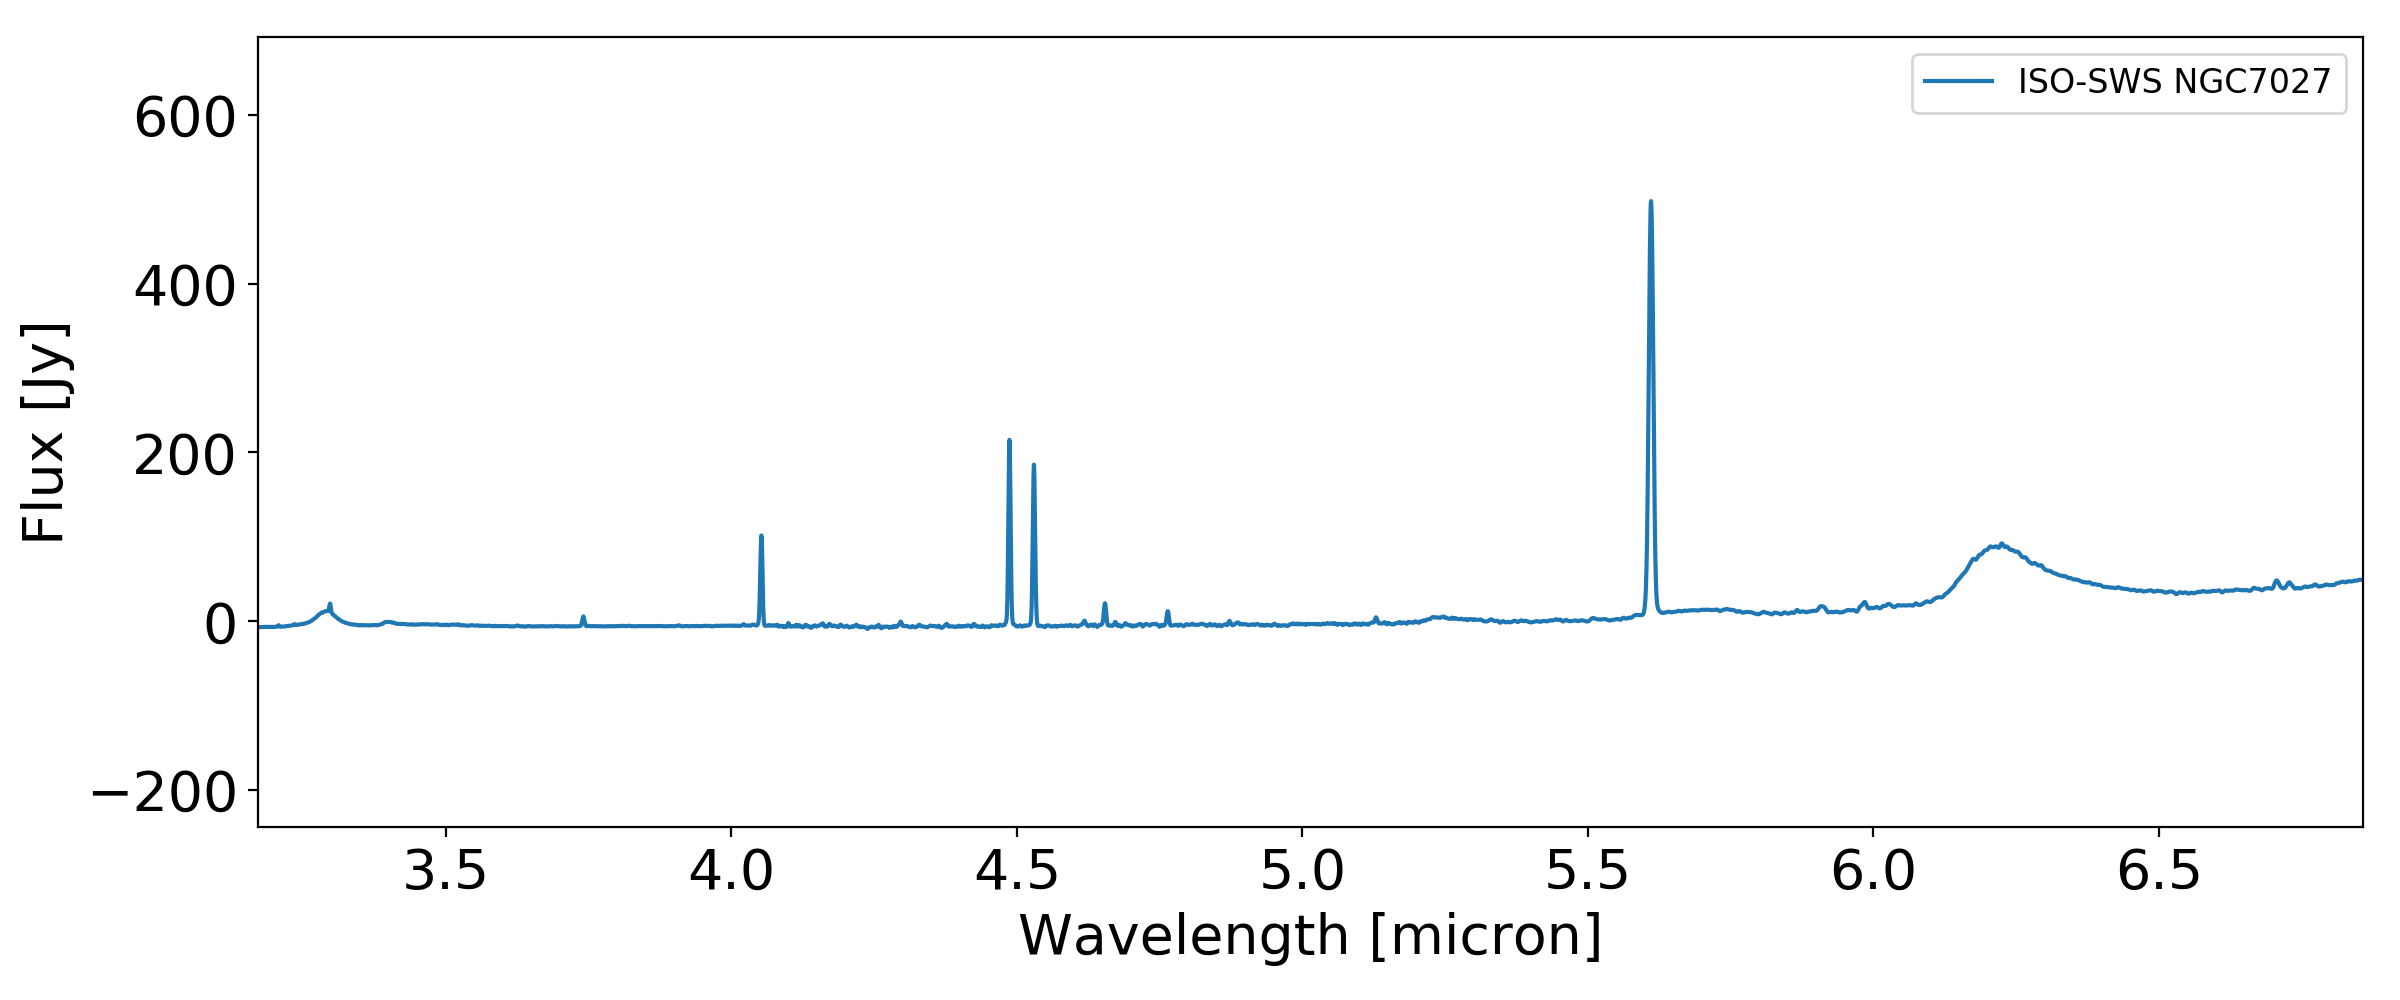

In [2]:
# Accessing wavelength (micron), flux density (Jansky) in planetary nebulae spectra of ISO-SWS / Highly Processed Data Products (HPDP) by Greg Sloan et al.
hdulist1 = fits.open(dataDir + "09400716_sws.fit")
hdulist2 = fits.open(dataDir + "55800537_sws.fit")
# hdulist3 = fits.open(dataDir + "02400714_pws.fit")

plt.figure(figsize=(12,5))
# plt.plot(hdulist1[0].data[:,0], hdulist1[0].data[:,1],label="ISO-SWS NGC6302")
plt.plot(hdulist2[0].data[:,0], hdulist2[0].data[:,1],label="ISO-SWS NGC7027")
plt.xlabel('Wavelength [micron]',fontsize=20)
plt.ylabel('Flux [Jy]',fontsize=20)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

# NGC 7027

In [7]:
# spatial extent
img_hdulist = fits.open(dataDir + "N20080702S0123.fits")
NGC7027_img = img_hdulist[1].data[0,0,:,:]
NGC7027_img[NGC7027_img<0] = 0

# WCS
RA = img_hdulist[0].header["RA"] # Right Ascension
DEC = img_hdulist[0].header["DEC"] # Declination
CRPIX1 = img_hdulist[0].header["CRPIX1"] # Ref pix of axis 1
CRVAL1 = img_hdulist[0].header["CRVAL1"] # Right Ascension at Ref pix in decimal degrees
CRPIX2 = img_hdulist[0].header["CRPIX2"] # Ref pix of axis 2
CRVAL2 = img_hdulist[0].header["CRVAL2"] # Declination at Ref pix in decimal degrees
PIXSIZ = img_hdulist[0].header["PIXELSIZ"] # [arcsec/pix] Pixel projected spatial size

print 'Source (RA,DEC) = ({},{}) deg'.format(RA,DEC)
print 'Image size: {} pix'.format(NGC7027_img.shape)
print 'Axis 1 reference value: {} RA, at pixel {}'.format(CRVAL1,CRPIX1)
print 'Axis 2 reference value: {} DEC, at pixel {} \n'.format(CRVAL2,CRPIX2)

# Convert DD (decimal degree) units to DMS units (degrees,arcminutes,arcseconds)
CRVAL1_D,CRVAL1_M,CRVAL1_S = np.floor(CRVAL1), np.floor((CRVAL1*60)%60), (np.abs(CRVAL1)*3600)%60
CRVAL2_D,CRVAL2_M,CRVAL2_S = np.floor(CRVAL2), np.floor((CRVAL2*60)%60), (np.abs(CRVAL2)*3600)%60

print 'Axis 1 reference value: {} deg, {} arcmin, {} arcsec'.format(CRVAL1_D,CRVAL1_M,CRVAL1_S)
print 'Axis 2 reference value: {} deg, {} arcmin, {} arcsec'.format(CRVAL2_D,CRVAL2_M,CRVAL2_S)

# Reconstruct spatial grid
CREF1_S = CRVAL1_S-CRPIX1*PIXSIZ # position zero
CREF2_S = CRVAL2_S-CRPIX2*PIXSIZ # position zero

xaxis  = np.linspace(CRVAL1_D+CRVAL1_M/60.+CREF1_S/3600.,CRVAL1_D+CRVAL1_M/60.+(CREF1_S+NGC7027_img.shape[1]*PIXSIZ)/3600.,NGC7027_img.shape[1])
yaxis = np.linspace(CRVAL2_D+CRVAL2_M/60.+CREF2_S/3600.,CRVAL2_D+CRVAL2_M/60.+(CREF2_S+NGC7027_img.shape[1]*PIXSIZ)/3600.,NGC7027_img.shape[0])

extent = [xaxis[0], xaxis[-1], yaxis[0], yaxis[-1]]

# ISO SWS field of view (not in RA and DEC!!! The field of view in the ISO SWS handbook is defined in the dispersion and cross-dispersion directions)
corner1 = (CRVAL1_D + CRVAL1_M/60. + (CRVAL1_S-7.)/3600.,CRVAL2_D + CRVAL2_M/60. + (CRVAL2_S-10.)/3600.)
corner2 = (CRVAL1_D + CRVAL1_M/60. + (CRVAL1_S+7.)/3600.,CRVAL2_D + CRVAL2_M/60. + (CRVAL2_S-10.)/3600.)
corner3 = (CRVAL1_D + CRVAL1_M/60. + (CRVAL1_S+7.)/3600.,CRVAL2_D + CRVAL2_M/60. + (CRVAL2_S+10.)/3600.)
corner4 = (CRVAL1_D + CRVAL1_M/60. + (CRVAL1_S-7.)/3600.,CRVAL2_D + CRVAL2_M/60. + (CRVAL2_S+10.)/3600.)

Source (RA,DEC) = (316.756625,42.23616667) deg
Image size: (240, 320) pix
Axis 1 reference value: 316.755445543 RA, at pixel 160.311745308
Axis 2 reference value: 42.2355824993 DEC, at pixel 122.27098553 

Axis 1 reference value: 316.0 deg, 45.0 arcmin, 19.6039563122 arcsec
Axis 2 reference value: 42.0 deg, 14.0 arcmin, 8.09699762761 arcsec


In [8]:
from astropy.wcs import WCS

w = WCS(dataDir + "N20080702S0123.fits")
hdulist = fits.open(dataDir + "N20080702S0123.fits")

print hdulist[1].data.shape
NAXIS1 = hdulist[1].data.shape[2]
NAXIS2 = hdulist[1].data.shape[3]
x = np.arange(NAXIS2)
y = np.arange(NAXIS1)
X, Y = np.meshgrid(x, y)
ra, dec = w.wcs_pix2world(X,Y, 0)

print ra[100,100],dec[100,100]
print w.wcs_pix2world(100,100, 1)

(1, 3, 240, 320)
316.7562540805703 42.23723289996699
[array(316.75629155), array(42.23726064)]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


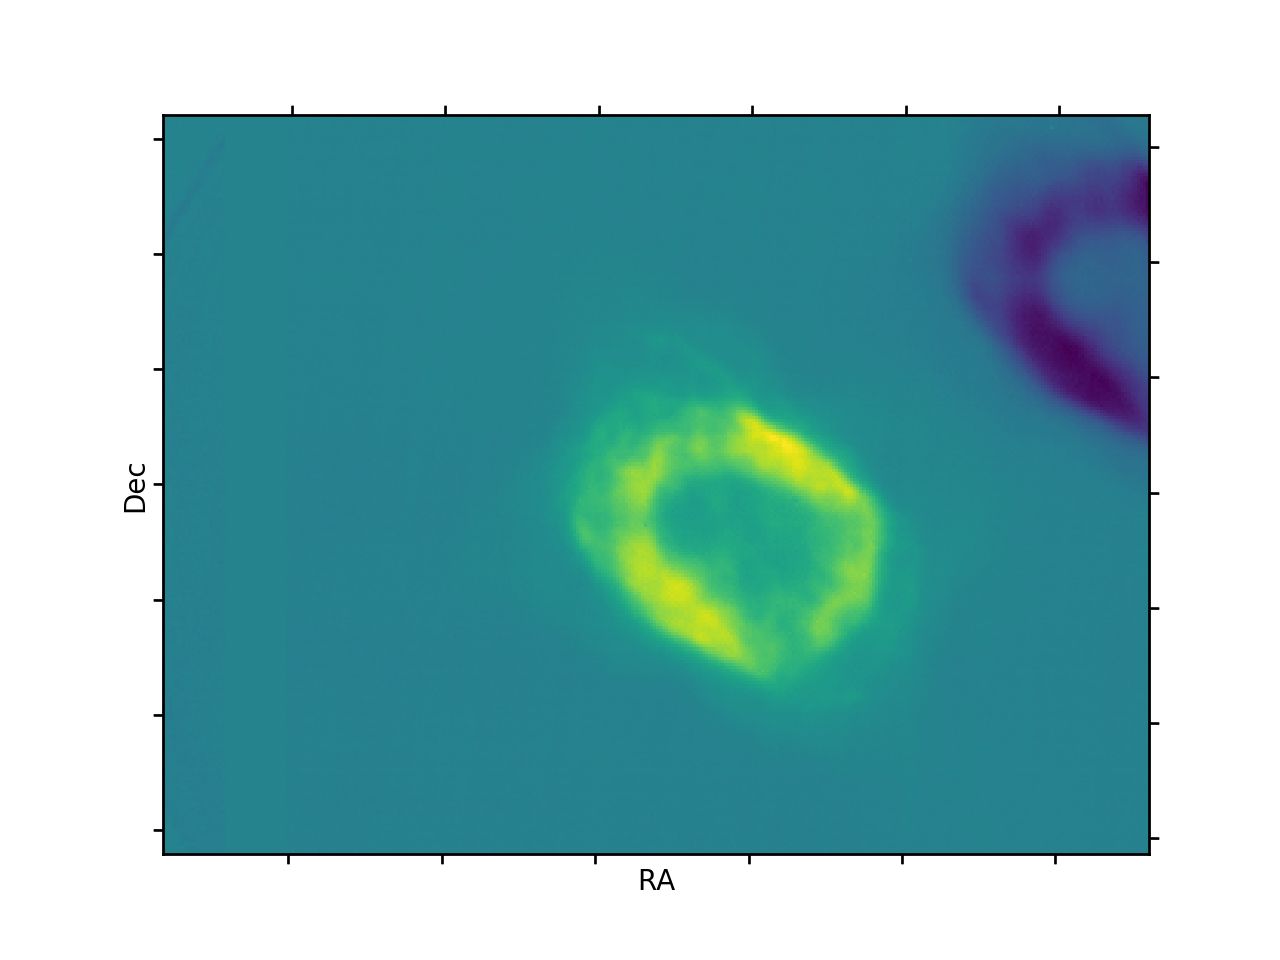

In [11]:
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename(dataDir + "N20080702S0123.fits")

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(fits.open(filename)[1].data[0,0,:,:], origin='lower', cmap=plt.cm.viridis)
# plt.scatter([corner1[0]],[corner1[1]],c='r',s=40)
# plt.scatter([corner2[0]],[corner2[1]],c='r',s=40)
# plt.scatter([corner3[0]],[corner3[1]],c='r',s=40)
# plt.scatter([corner4[0]],[corner4[1]],c='r',s=40)
plt.xlabel('RA')
plt.ylabel('Dec')

<IPython.core.display.Javascript object>


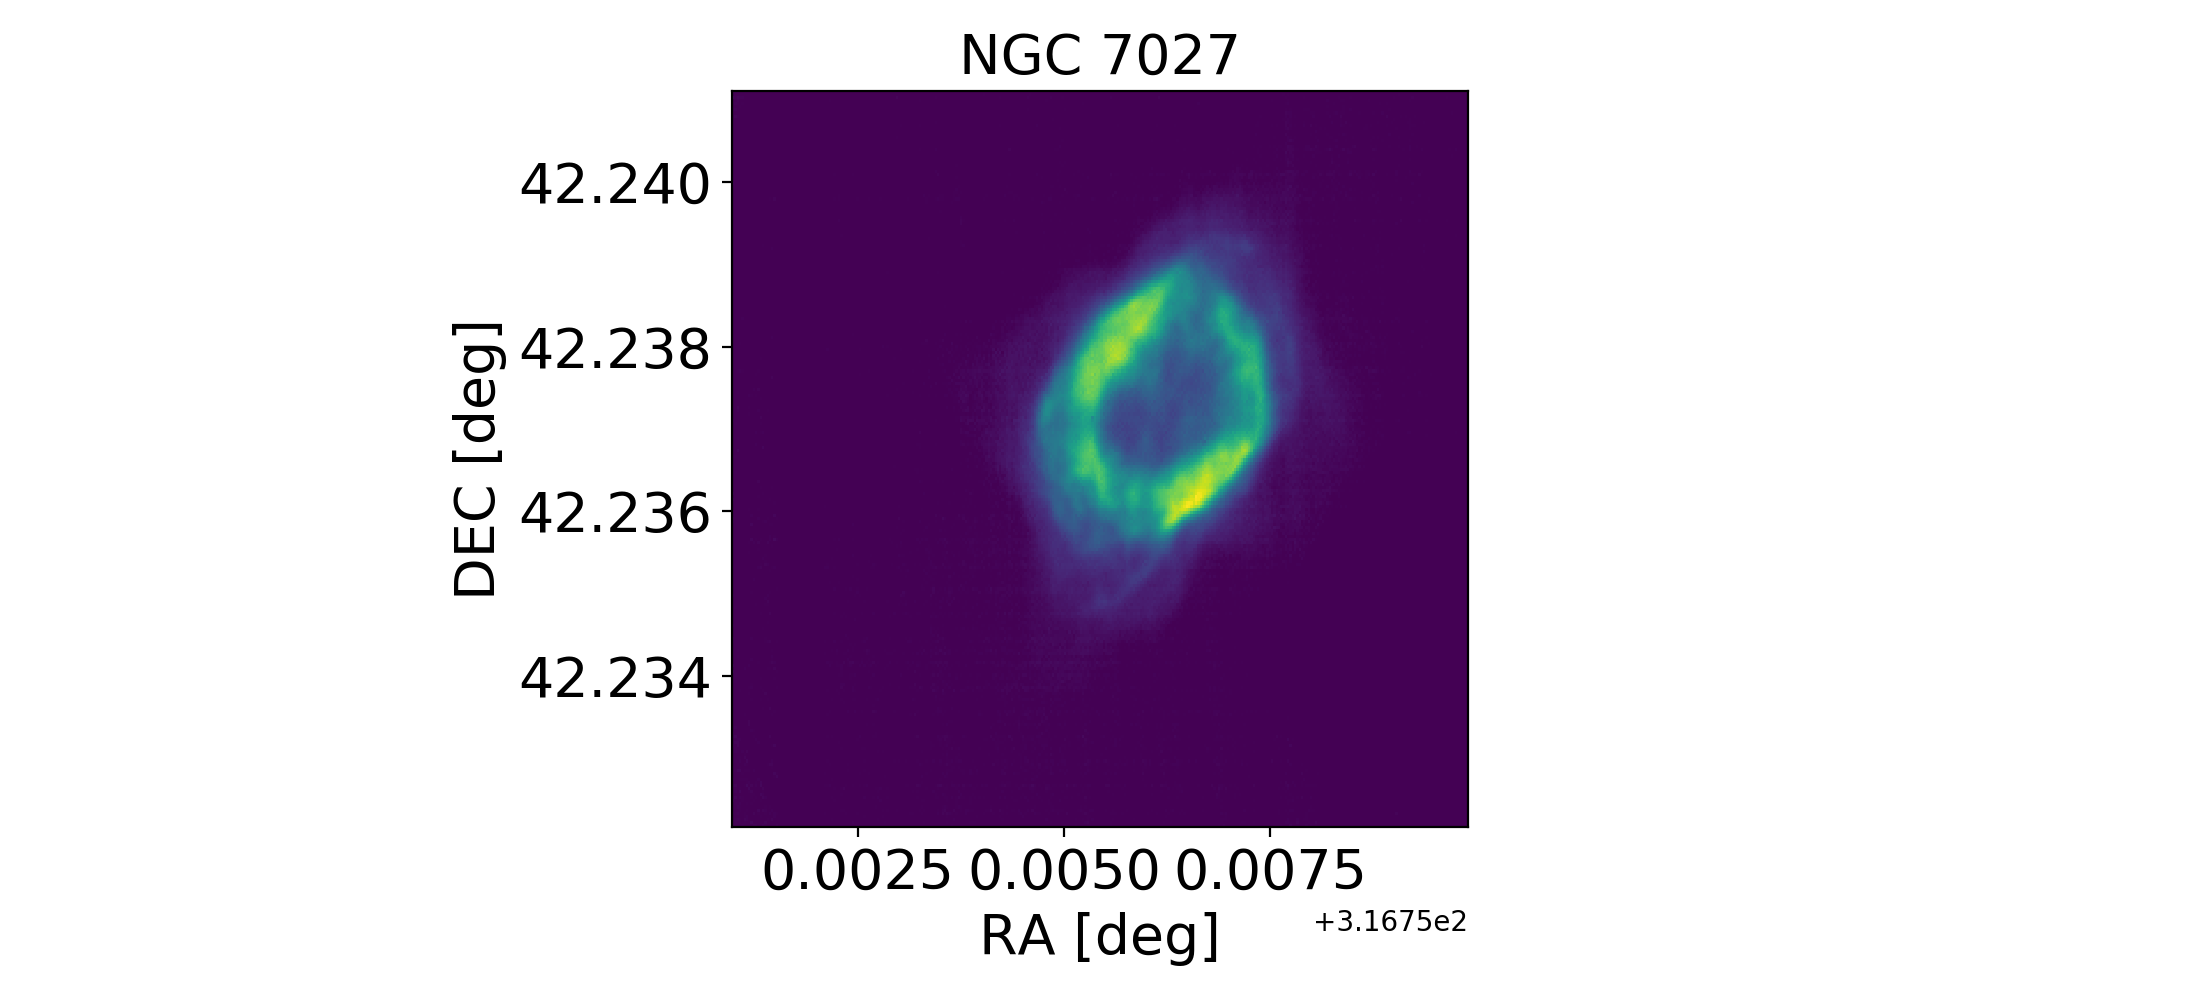

In [15]:
# plt.figure(figsize=(11,5))
# plt.imshow(NGC7027_img,extent=extent,aspect=1.)
# # plt.scatter([RA],[DEC],c='r',s=40)
# # plt.scatter([corner1[0]],[corner1[1]],c='r',s=40)
# # plt.scatter([corner2[0]],[corner2[1]],c='r',s=40)
# # plt.scatter([corner3[0]],[corner3[1]],c='r',s=40)
# # plt.scatter([corner4[0]],[corner4[1]],c='r',s=40)
# plt.xlabel('RA [deg]',fontsize=20)
# plt.ylabel('DEC [deg]',fontsize=20)
# plt.title('NGC 7027',fontsize=20)
# plt.tick_params(axis='both',labelsize=20)
# plt.tight_layout()

<IPython.core.display.Javascript object>


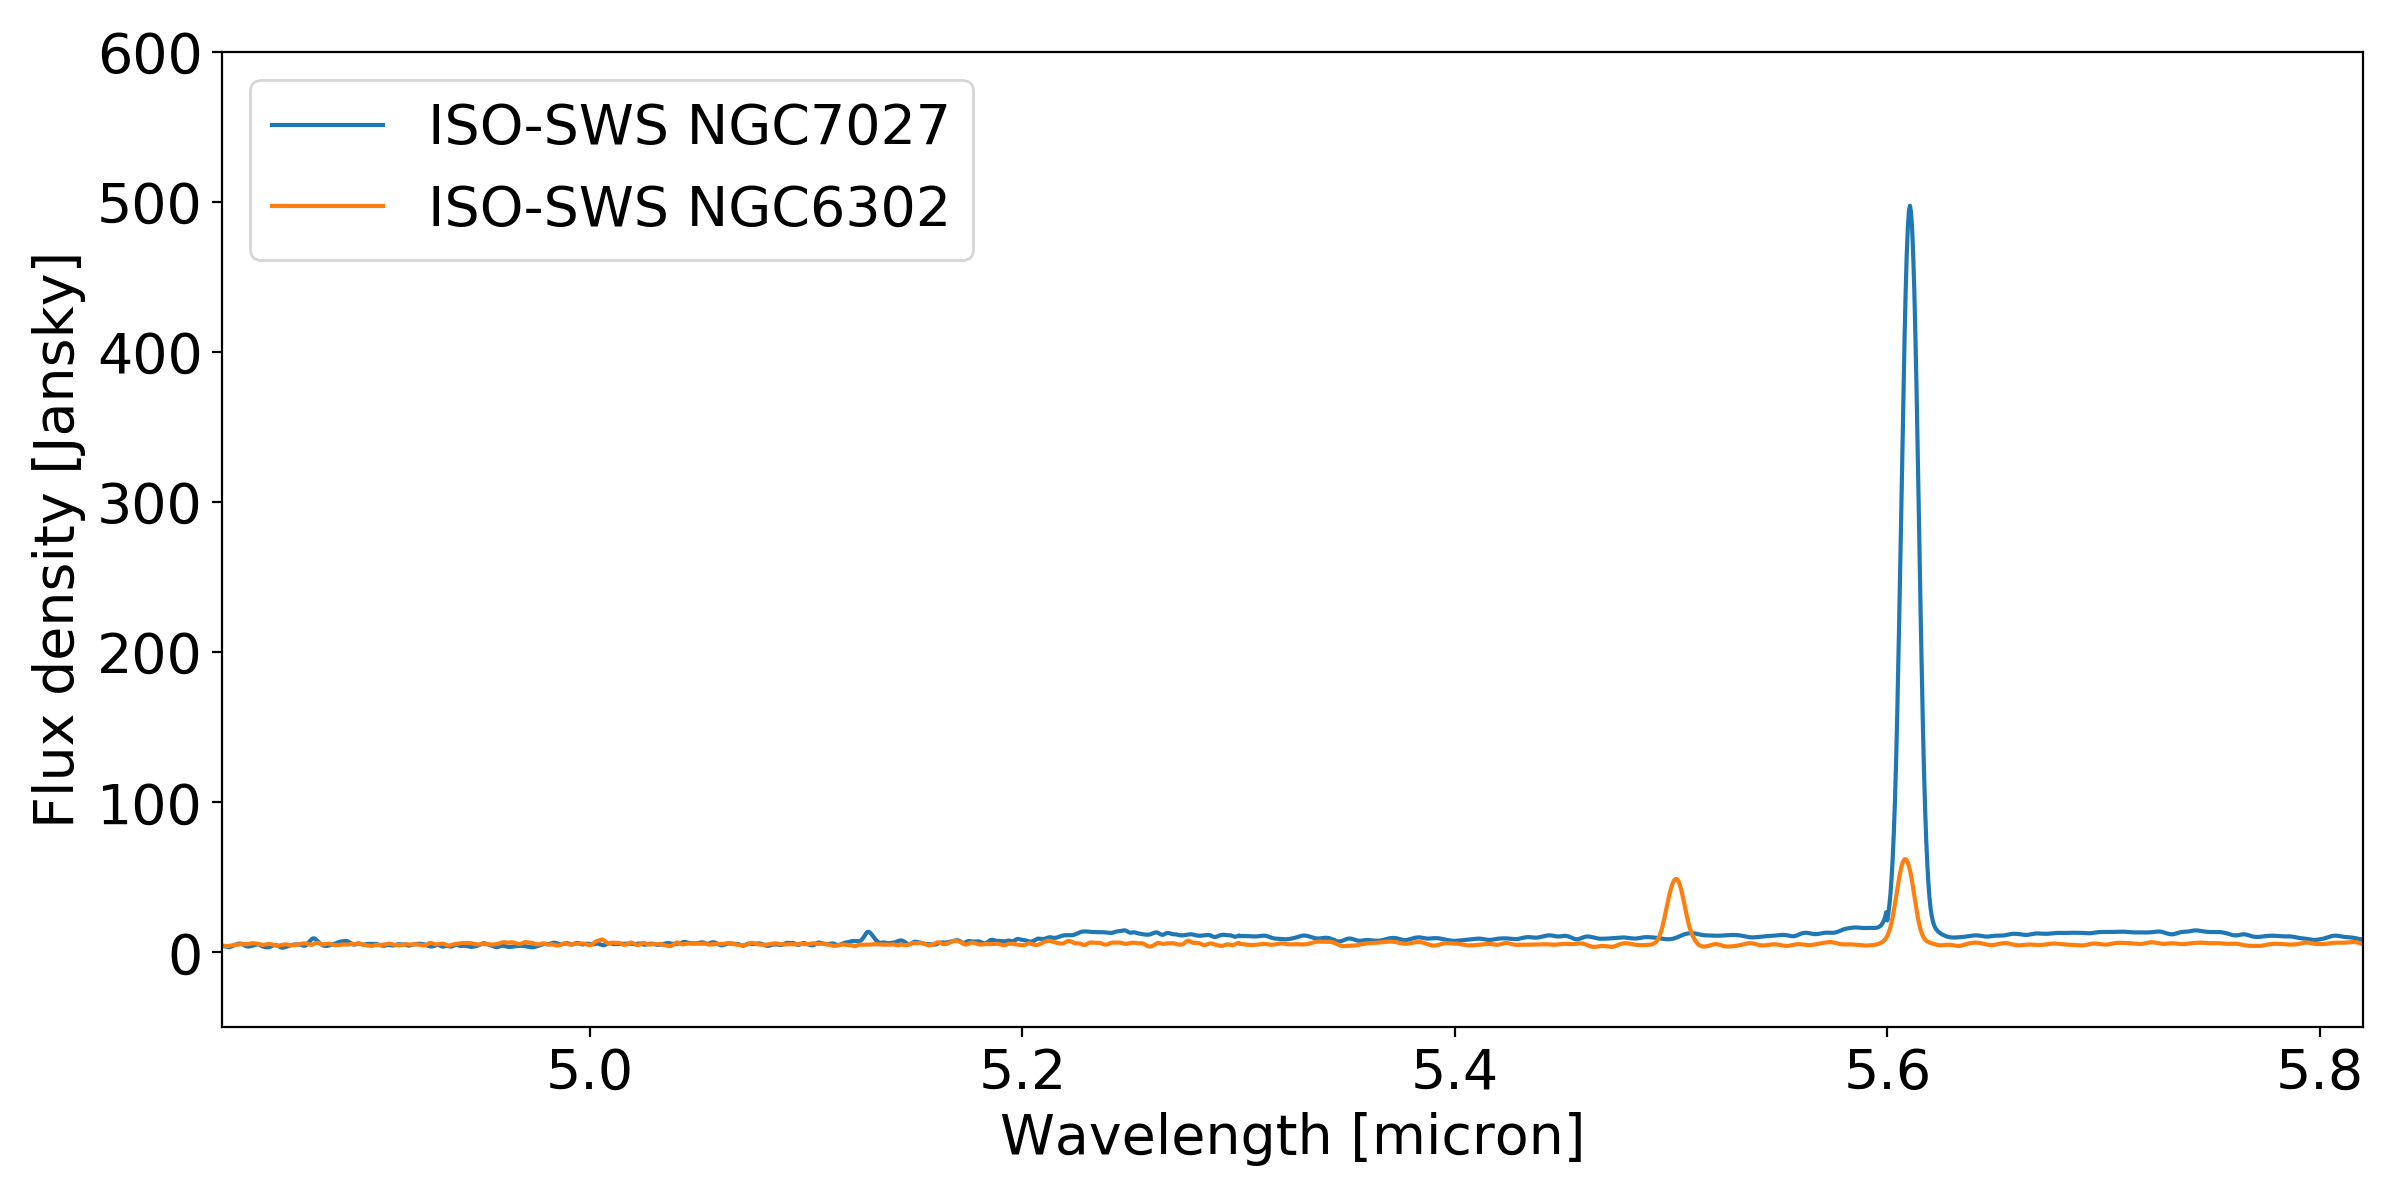

In [16]:
# spectral energy distribution
hdulist2 = fits.open(dataDir + "55800537_sws.fit")
wavl = hdulist2[0].data[:,0]
spec = hdulist2[0].data[:,1]

# use reference flux at 3 micron to derive correction for NGC7027 spectrum below 6micron
ref_wvl   = 3*10**-6 # m
ref_value = 5 * 10** -17 # Watt cm-2 micron-1

c = 299792458. # speed of light, m/s

ref_value *= 10**4            # Watt m-2 micron-1
ref_value *= (ref_wvl**2 / c) # Watt m-2 Hz -1
ref_value *= 10**26           # Jansky 

spec2 = spec.copy()
spec2[wavl<5.6] += (ref_value-spec2[wavl<5.6].min())

plt.figure(figsize=(12,6))
sel = (wavl>=funcs.mrs_aux('1A')[3][0]) & (wavl<=funcs.mrs_aux('1A')[3][1])
plt.plot(wavl[sel],spec2[sel],label="ISO-SWS NGC7027")
plt.plot(hdulist1[0].data[:,0], hdulist1[0].data[:,1],label="ISO-SWS NGC6302")
# plt.hlines(0,wavl[0],wavl[-1])
plt.xlim(wavl[sel].min(),wavl[sel].max())
plt.ylim(-50,600)
plt.xlabel('Wavelength [micron]',fontsize=20)
plt.ylabel('Flux density [Jansky]',fontsize=20)
plt.legend(loc='upper left',fontsize=20)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

# Build MIRISim input cube from spatial and spectral information

In [6]:
# UNCOMMENT TO BUILD MIRISIM CUBES
# spatial distribution NGC7027
img_hdulist = fits.open(dataDir + "N20080702S0123.fits")
pixel_scale = img_hdulist[0].header['PIXELSIZ']  # arcsec/pix
NGC7027_img = img_hdulist[1].data[0,0,:,:]
#> normalise the image
image_total = np.sum(np.sum(NGC7027_img, axis=0), axis=0)
norm_image = NGC7027_img / image_total
image_dim = norm_image.shape

# create the datacubes
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    print 'Band {}'.format(band)
    # give output filename
    out_filename = "mirisim_input_cubes/NGC7027_mirisim_input_cube_band{}.fits".format(band)
    # spectral distribution, [microns] and [Jy]
    sel_wvl = (wavl>=funcs.mrs_aux(band)[3][0]) & (wavl<=funcs.mrs_aux(band)[3][1])
    wave_scale  = wavl[sel_wvl][1]-wavl[sel_wvl][0]
    interp_wavl = np.arange(wavl[sel_wvl][0]+wave_scale,wavl[sel_wvl][-1]-wave_scale,wave_scale)
    interp_spec = scp_interpolate.interp1d(wavl[sel_wvl],spec2[sel_wvl])(interp_wavl)
    wave_length = len(interp_wavl)
    
    # create the datacube
    datacube = np.zeros([wave_length,image_dim[0],image_dim[1]])
    for n in range(wave_length):
        frame = ((interp_spec[n] * norm_image) * 1.e6) /pixel_scale**2 # convert Jansky to microJy per arcsec^2
        datacube[n,:,:] = frame
    
    prihdr = fits.Header()
    prihdr['CRVAL1'] = 0
    prihdr['CRPIX1'] = CRPIX1
    prihdr['CDELT1'] = pixel_scale
    prihdr['CTYPE1'] = 'RA---TAN'
    prihdr['CUNIT1'] = 'arcsecond'
    prihdr['CRVAL2'] = 0
    prihdr['CRPIX2'] = CRPIX2
    prihdr['CDELT2'] = pixel_scale
    prihdr['CTYPE2'] = 'DEC--TAN'
    prihdr['CUNIT2'] = 'arcsecond'
    prihdr['CRVAL3'] = interp_wavl[0]
    prihdr['CRPIX3'] = 0
    prihdr['CDELT3'] = wave_scale    
    prihdr['CTYPE3'] = 'WAVE'
    prihdr['CUNIT3'] = 'micron'
    prihdr['UNITS'] = 'uJy arcsec-2'
    
    # save fits
    out_hdu = fits.PrimaryHDU(datacube,header=prihdr)
    hdulist = fits.HDUList([out_hdu])
    hdulist.writeto(out_filename,overwrite=True)
    hdulist.close()

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C
